In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    nearest_city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = nearest_city.city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country = nearest_city.country_code
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

619

In [52]:
len(countries) #check that countries list length matches up to cities list length

619

## Perform API Calls

In [53]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="
reference= requests.get(url+"astana"+","+"kz").json() # using as reference
pprint(reference)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.13, 'lon': 71.43},
 'dt': 1538604000,
 'id': 1526273,
 'main': {'humidity': 70,
          'pressure': 1024,
          'temp': 42.8,
          'temp_max': 42.8,
          'temp_min': 42.8},
 'name': 'Astana',
 'sys': {'country': 'KZ',
         'id': 7193,
         'message': 0.0038,
         'sunrise': 1538529538,
         'sunset': 1538570778,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 170, 'speed': 8.95}}


In [54]:
weather_data = pd.DataFrame({"City":cities, "Country Code":countries})
headings = ["City ID", "Latitude", "Max Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
for x in headings:
    weather_data[x]=""
    weather_data[[x]]=weather_data[[x]].apply(pd.to_numeric, errors='coerce')
weather_data["Date"]=""
weather_data.dtypes

City                    object
Country Code            object
City ID                float64
Latitude               float64
Max Temperature (F)    float64
Humidity (%)           float64
Cloudiness (%)         float64
Wind Speed (mph)       float64
Date                    object
dtype: object

In [55]:
for index, row in weather_data.iterrows():
    #get city name from data frame
    city_name = row["City"]
    
    #get country code from data frame
    country_code = row["Country Code"]
    
    #make API request
    response = requests.get(url+city_name+","+country_code).json()
    
    try: # if city is in open weather map api then... 
        print(f"Retrieving results for {city_name},{country_code}, city id: {response['id']}.") # print which city you are retriving results for
        
        weather_data.loc[index, "City ID"] = response['id'] # add city id to data frame
        weather_data.loc[index, "Latitude"] = response['coord']['lat'] #add latitude to data frame
        weather_data.loc[index, "Max Temperature (F)"] = response['main']['temp_max'] # add temp to df
        weather_data.loc[index, "Humidity (%)"] = response['main']['humidity'] # add humidity to df
        weather_data.loc[index, "Cloudiness (%)"] = response['clouds']['all'] # add cloudiness to df
        weather_data.loc[index, "Wind Speed (mph)"] = response['wind']['speed'] #add wind speed to df
        weather_data.loc[index, "Date"] = response['dt'] # add Time of data calculation, unix, UTC
        
    except (KeyError, IndexError):  # if city is not in open weather map api, then..
        print("Missing field/result... skipping.") # print that it is not found, and that we are skipping it
    
    print("------------") #seperation between cities, easier to read

Retrieving results for nouadhibou,mr, city id: 2377457.
------------
Retrieving results for butaritari,ki, city id: 2110227.
------------
Retrieving results for punta arenas,cl, city id: 3874787.
------------
Retrieving results for qaanaaq,gl, city id: 3831208.
------------
Retrieving results for cape town,za, city id: 3369157.
------------
Retrieving results for ushuaia,ar, city id: 3833367.
------------
Retrieving results for rikitea,pf, city id: 4030556.
------------
Missing field/result... skipping.
------------
Retrieving results for pangnirtung,ca, city id: 6096551.
------------
Retrieving results for kapaa,us, city id: 5848280.
------------
Retrieving results for sitka,us, city id: 4267710.
------------
Retrieving results for vaini,to, city id: 4032243.
------------
Retrieving results for cacoal,br, city id: 3925212.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for bredasdorp,za, city id: 1015776.
-

Retrieving results for pevek,ru, city id: 2122090.
------------
Retrieving results for geraldton,au, city id: 2070998.
------------
Retrieving results for teguldet,ru, city id: 1489822.
------------
Retrieving results for vostok,ru, city id: 2013279.
------------
Retrieving results for saskylakh,ru, city id: 2017155.
------------
Retrieving results for salym,ru, city id: 1493162.
------------
Retrieving results for moose factory,ca, city id: 6078372.
------------
Retrieving results for chokurdakh,ru, city id: 2126123.
------------
Retrieving results for klaksvik,fo, city id: 2618795.
------------
Retrieving results for sabang,id, city id: 1623502.
------------
Retrieving results for katsuura,jp, city id: 1865309.
------------
Retrieving results for sisimiut,gl, city id: 3419842.
------------
Retrieving results for turtas,ru, city id: 1540475.
------------
Retrieving results for ostrovnoy,ru, city id: 556268.
------------
Retrieving results for viedma,ar, city id: 3832899.
------------


Retrieving results for kanniyakumari,in, city id: 1268008.
------------
Retrieving results for totskoye,ru, city id: 481955.
------------
Retrieving results for hualmay,pe, city id: 3939761.
------------
Retrieving results for bulgan,mn, city id: 2032201.
------------
Retrieving results for ancud,cl, city id: 3899695.
------------
Retrieving results for port alfred,za, city id: 964432.
------------
Missing field/result... skipping.
------------
Retrieving results for sohag,eg, city id: 347796.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Retrieving results for leon,es, city id: 3118532.
------------
Retrieving results for veraval,in, city id: 1253237.
------------
Retrieving results for pirogovo,ru, city id: 509401.
------------
Retrieving results for raton,us, city id: 5486795.
------------
Missing field/result... skipping.
------------
Retrieving results for dudinka,ru, city id: 1507116.
------------
Retrieving results for

Retrieving results for matara,lk, city id: 1235846.
------------
Retrieving results for sur,om, city id: 286245.
------------
Retrieving results for meiganga,cm, city id: 2227402.
------------
Retrieving results for ongandjera,na, city id: 3354178.
------------
Retrieving results for matagami,ca, city id: 6067747.
------------
Retrieving results for buluang,ph, city id: 1717512.
------------
Retrieving results for yulara,au, city id: 6355222.
------------
Retrieving results for kapit,my, city id: 1737185.
------------
Retrieving results for chenzhou,cn, city id: 1815059.
------------
Retrieving results for la ronge,ca, city id: 6050066.
------------
Retrieving results for olimpia,br, city id: 3455923.
------------
Retrieving results for shanghai,cn, city id: 1796236.
------------
Retrieving results for mount gambier,au, city id: 2156643.
------------
Retrieving results for neuquen,ar, city id: 3843123.
------------
Retrieving results for ilabaya,pe, city id: 3938455.
------------
Retri

Retrieving results for ripoll,es, city id: 3111607.
------------
Retrieving results for montepuez,mz, city id: 1037125.
------------
Retrieving results for vila velha,br, city id: 6320062.
------------
Retrieving results for terrace,ca, city id: 6162949.
------------
Missing field/result... skipping.
------------
Retrieving results for pacific grove,us, city id: 5380437.
------------
Retrieving results for karakulino,ru, city id: 552830.
------------
Missing field/result... skipping.
------------
Retrieving results for batemans bay,au, city id: 2176639.
------------
Retrieving results for longyan,cn, city id: 1802276.
------------
Missing field/result... skipping.
------------
Retrieving results for sambava,mg, city id: 1056899.
------------
Retrieving results for ramanuj ganj,in, city id: 1258731.
------------
Retrieving results for vao,nc, city id: 2137773.
------------
Retrieving results for kruisfontein,za, city id: 986717.
------------
Retrieving results for tautira,pf, city id: 4

In [57]:
weather_data.head() # check that data was correctly added

,City,Country Code,City ID,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,nouadhibou,mr,2377457.0,20.93,80.60,54.0,68.0,21.92,1538604000
1,butaritari,ki,2110227.0,3.07,84.99,100.0,8.0,6.40,1538606897
2,punta arenas,cl,3874787.0,-53.16,46.40,49.0,20.0,26.40,1538604000
3,qaanaaq,gl,3831208.0,77.48,16.86,100.0,0.0,15.68,1538606922
4,cape town,za,3369157.0,-33.93,57.20,67.0,0.0,13.87,1538604000


In [58]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'],unit='s') #convert UNIX to readable date
weather_data.head()

,City,Country Code,City ID,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,nouadhibou,mr,2377457.0,20.93,80.60,54.0,68.0,21.92,2018-10-03 22:00:00
1,butaritari,ki,2110227.0,3.07,84.99,100.0,8.0,6.40,2018-10-03 22:48:17
2,punta arenas,cl,3874787.0,-53.16,46.40,49.0,20.0,26.40,2018-10-03 22:00:00
3,qaanaaq,gl,3831208.0,77.48,16.86,100.0,0.0,15.68,2018-10-03 22:48:42
4,cape town,za,3369157.0,-33.93,57.20,67.0,0.0,13.87,2018-10-03 22:00:00


In [59]:
weather_data.count() # check for missing values

City                   619
Country Code           619
City ID                544
Latitude               544
Max Temperature (F)    544
Humidity (%)           544
Cloudiness (%)         544
Wind Speed (mph)       544
Date                   544
dtype: int64

In [60]:
clean_weather_data = weather_data.dropna(how="any")
clean_weather_data.count() # check that they've been dropped

City                   544
Country Code           544
City ID                544
Latitude               544
Max Temperature (F)    544
Humidity (%)           544
Cloudiness (%)         544
Wind Speed (mph)       544
Date                   544
dtype: int64

In [65]:
clean_weather_data.head()

,City,Country Code,City ID,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,nouadhibou,mr,2377457.0,20.93,80.60,54.0,68.0,21.92,2018-10-03 22:00:00
1,butaritari,ki,2110227.0,3.07,84.99,100.0,8.0,6.40,2018-10-03 22:48:17
2,punta arenas,cl,3874787.0,-53.16,46.40,49.0,20.0,26.40,2018-10-03 22:00:00
3,qaanaaq,gl,3831208.0,77.48,16.86,100.0,0.0,15.68,2018-10-03 22:48:42
4,cape town,za,3369157.0,-33.93,57.20,67.0,0.0,13.87,2018-10-03 22:00:00


In [66]:
clean_weather_data.to_csv(output_data_file, encoding='utf-8', index=False) # save dataframe to csv file

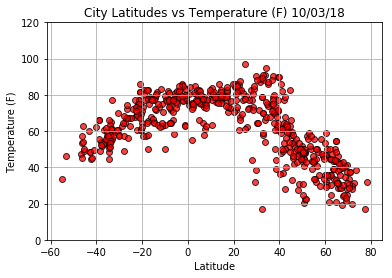

In [88]:
latitudes = clean_weather_data['Latitude']
temp = clean_weather_data['Max Temperature (F)']
hum = clean_weather_data['Humidity (%)']
cloud = clean_weather_data['Cloudiness (%)']
ws = clean_weather_data['Wind Speed (mph)']

# Latitudes Vs Temp plot

TempvLat_plt = plt.scatter(latitudes, temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Temperature (F) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,120)

# Save Figure
TempvLat = plt.gcf()
plt.show
TempvLat.savefig("Images/City Latitudes vs Temperature(F).png", bbox_inches="tight")

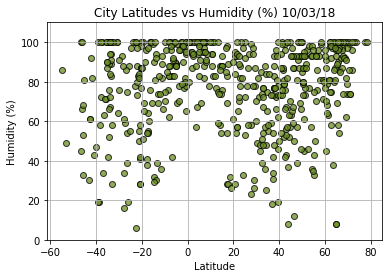

In [89]:
# Latitudes Vs Humidity plot

HumvLat_plt = plt.scatter(latitudes, hum, marker="o", facecolors="olivedrab", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Humidity (%) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)

# Save Figure
HumvLat = plt.gcf()
plt.show
HumvLat.savefig("Images/City Latitudes vs Humidity(%).png", bbox_inches="tight")

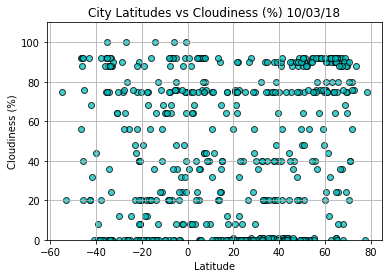

In [90]:
# Latitudes Vs Cloudiness plot

HumvLat_plt = plt.scatter(latitudes, cloud, marker="o", facecolors="c", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Cloudiness (%) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,110)

# Save Figure
CloudvLat = plt.gcf()
plt.show
CloudvLat.savefig("Images/City Latitudes vs Cloudiness(%).png", bbox_inches="tight")

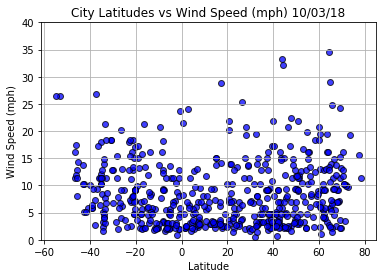

In [91]:
# Latitudes Vs Wind Speed plot

HumvLat_plt = plt.scatter(latitudes, ws, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitudes vs Wind Speed (mph) 10/03/18")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)

# Save Figure
WSvLat = plt.gcf()
plt.show
WSvLat.savefig("Images/City Latitudes vs Wind Speed(mph).png", bbox_inches="tight")